In [1]:
# pip install python-docx 
# pip install openpyxl
import os
import pandas as pd
import re
import openpyxl
import docx
import string
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from googletrans import Translator 
from transliterate import translit, get_available_language_codes
import translators as ts
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1124)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1124)>
Using Russia server backend.


In [42]:
doc = docx.Document('scalaWords.docx')
allText = []
for docpara in doc.paragraphs:
    allText.append(docpara.text)

allText[24]

'Why do we call this type RGBA? This is because each pixel value is composed from 4 components - red, green, blue and alpha, where alpha denotes the amount of transparency in the respective pixel. These components are referred to as channels. The value of each channel is at least 0 and at most 255.'

In [43]:
full_data = ' '.join(allText).lower()
full_data[100:105]

'are s'

In [44]:
tt = str.maketrans(dict.fromkeys(string.punctuation))
full_data = full_data.translate(tt)

# spec_chars = string.punctuation + '\n\xa0«»\t—…' 
# text = "".join([ch for ch in text if ch not in spec_chars])

# mystr = re.sub(r"[#%!@*]", "", mystr)

In [45]:
full_data = re.sub(r'[^\w\s]+|[\d]+', r'', full_data).strip()

In [46]:
full_data[100:105]

'ittin'

In [47]:
text_tokens = word_tokenize(full_data)
text_tokens[300:303]

['types', 'and', 'helper']

In [48]:
len(text_tokens)

23587

In [50]:
for t in text_tokens:
    if len(t) < 4:
        text_tokens.remove(t)

In [51]:
text_tokens[300:303]

['rgba', 'datay', 'width']

In [52]:
len(text_tokens)

14998

In [53]:
# Для применения инструментов частотного анализа библиотеки NLTK необходимо список токенов преобразовать к классу Text
text = nltk.Text(text_tokens)
print(type(text))

<class 'nltk.text.Text'>


In [54]:
# подсчёта статистики распределения частот слов в тексте
fdist = FreqDist(text)
fdist.most_common(5)

[('the', 294), ('that', 281), ('this', 243), ('will', 161), ('which', 161)]

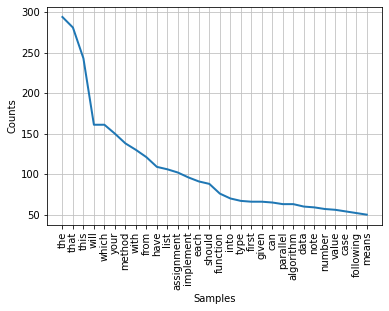

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
fdist.plot(30,cumulative=False)

In [56]:
# Удаление стоп-слов
english_stopwords = stopwords.words("english")

In [57]:
# Список стоп-слов может быть расширен с помощью стандартного метода extend

In [58]:
to_extend =[]
l = 100
for i in range(0,l):
    to_extend.append(fdist.most_common(l)[i][0])

In [59]:
english_stopwords.extend(to_extend)

In [60]:
def entries_to_remove(entries, the_dict):
    for key in entries:
        if key in the_dict:
            del the_dict[key]

In [61]:
entries_to_remove(english_stopwords, fdist)

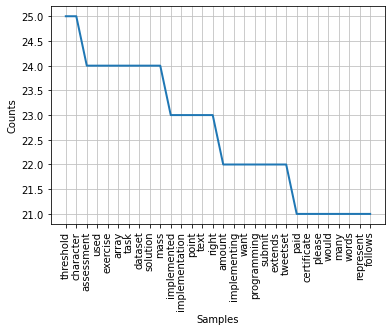

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [62]:
fdist.plot(30,cumulative=False)

In [63]:
sample = pd.DataFrame(fdist.keys())
sample.sample(1)

,0
1291,trigonometic


In [64]:
sample.to_excel("merged.xlsx")

In [56]:
sample.save(filename = 'sample_book.xlsx')

AttributeError: 'list' object has no attribute 'save'

In [28]:
# for k in fdist.keys():
#     fdist[k] = ts.deepl(k, from_language='en', to_language='ru')

In [29]:
# word = 'substitution'
# print(ts.deepl(word, from_language='en', to_language='ru'))

In [38]:
# Визуализация популярности слов в виде облака
text_raw = " ".join(text)
wordcloud = WordCloud().generate(text_raw)

https://pypi.org/project/translate-api/#getting-started